In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme("chesterish")

In [10]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")

%matplotlib inline

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.num_qubits
    
    circuit.measure([i for i in range(num_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

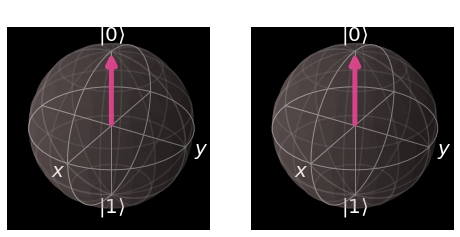

In [11]:
circuit = q.QuantumCircuit(2,2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

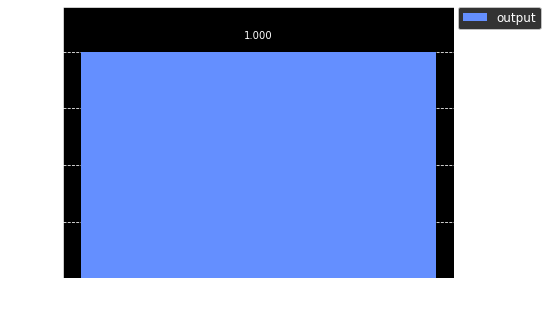

In [12]:
plot_histogram([counts], legend=["output"])

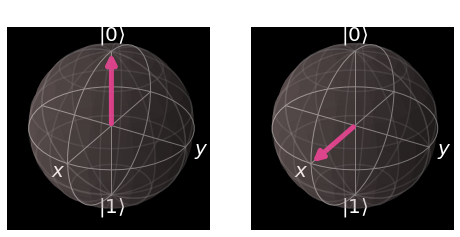

In [13]:
circuit = q.QuantumCircuit(2,2)
circuit.h(1)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

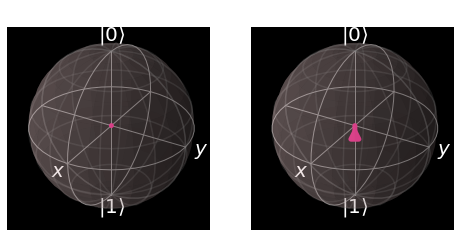

In [21]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

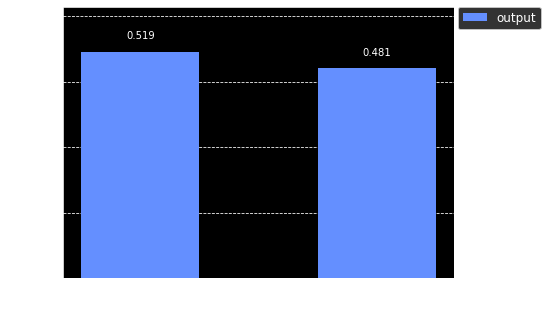

In [22]:
plot_histogram([counts], legend=["output"])

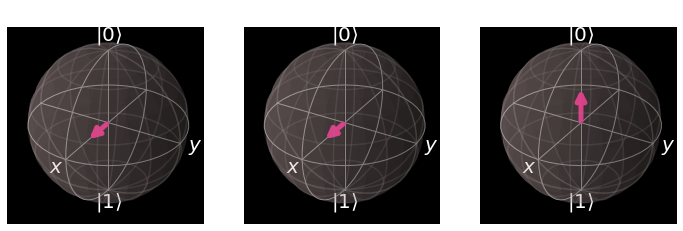

In [26]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

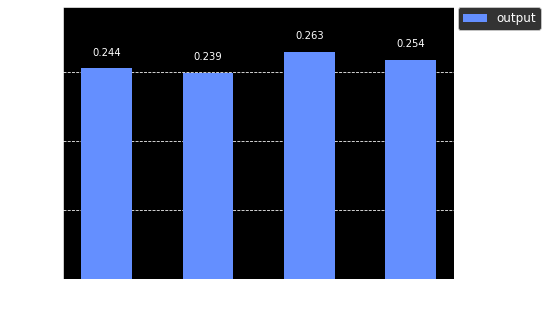

In [27]:
plot_histogram([counts], legend=["output"])

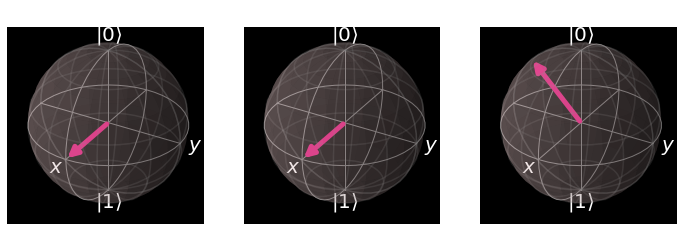

In [31]:
import math
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4,2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

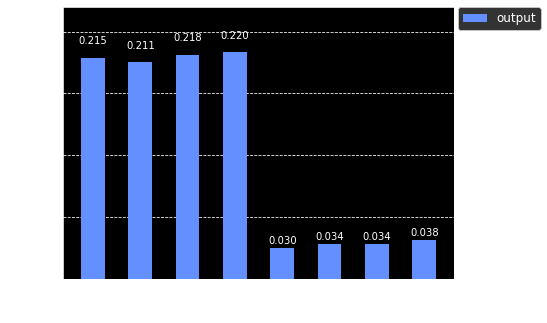

In [32]:
plot_histogram([counts], legend=["output"])

In [36]:
circuit = q.QuantumCircuit(3,1)
circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4,2)
circuit.measure([2],[0])
circuit.draw()

┌───┐      
q_0: ───┤ H ├──────
        ├───┤      
q_1: ───┤ H ├──────
     ┌──┴───┴──┐┌─┐
q_2: ┤ Rx(π/4) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

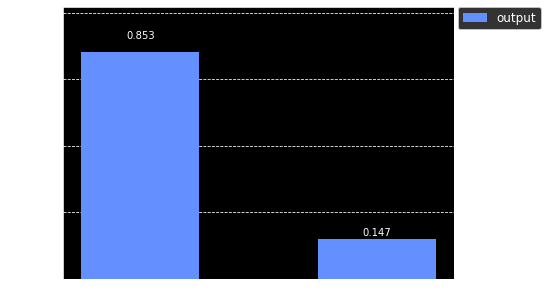

In [37]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=["output"])